 <h1> <center> COVID-19 in 2020 across the United States of America </center></h1>
<center>This notebook will take a look at a large dataset which is publically available and use necessary tools to analyse the data. The main focus will be data visualisation and getting meaniful interpretations of the data. Furthermore, the visualisation will atleast consist of five (5) data plots, which will include a heatmap and other varities.</center>


<h2> <center> COVID-19 in the USA </center> </h2> 
    
This report provides visualisation of US COVID-19 data and the relationship between different data attributes.  
    
The data used for visualisation in this report came from https://www.kaggle.com/sudalairajkumar/covid19-in-usa?select=us_states_covid19_daily.csv. The data contains COVID-19 data from across the USA taken from January 2020 to December 2020 on an almost daily basis.

The data includes 15,633-rows and 55-columns of COVID-19 data. Each row is a unique value across different data attributes like: daily positive cases, daily negative cases, hospitalisaiton, recovery, deaths, total number of tests done, and people on ventilators just to name a few. Since, the visualisations are based on US states a legend will be outlined in the table below to highlight the abbreviations of each state and territories, i.e. TX-Texas, CA-California.

| Full Name | 2-Letter Indicator 
| --- | --- |
| Alabama |AL
| Alaska | AK
| Arkansas |AR
| Arizona |AZ
| California |CA
| Colorado |CO
| Connecticut |CT
| Delaware |DE
| District of Columbia |DC
| Florida |FL
| Georgia |GA
| Hawaii |HI
| Idaho |ID
| Illinois |IL
| Indiana |IN
| Iowa |IA
| Kansas |KS
| Kentucky |KY
| Louisiana |LA
| Maine |ME
| Maryland |MD
| Massachusetts |MA
| Michigan |MI
| Minnesota |MN
| Mississippi |MS
| Missouri |MO
| Montana|MT
| Nebraska|NE
| Nevada|NV
| New Hampshire|NH
| New Jersey|NJ
| New Mexico |NM
| New York |NY
| North Carolina |NC
| North Dakota |ND
| Ohio |OH
| Oklahoma |OK
| Oregon |OR
| Pennsylvania |PA
| Rhode Island |RI
| South Carolina |SC
| South Dakota |SD
| Tennessee |TN
| Texas |TX
| Utah |UT
| Vermont |VT
| Virginia |VA
| Washington |WA
| West Virginia |WV
| Wisconsin |WI
| Wyoming |WY
| American Samoa |AS
    | Guam |GU
    |Puerto Rico| PR
    | Northern Mariana Islands| MP
    | US Virgin Islands |VI


<blockquote style="border-left-color:#c28900;background:#65bffc"> The question that I wanted answered was which state(s) handled the pandemic the best/worst in terms of minimising deaths and hospitalisaiotns. </blockquote>

### The Raw Data
Before the data can be used for visualisation it has to be first read into a data frame, and before that can happen a couple of libraries have to be imported. These are 'pandas', 'numpy', 'matplotlib' and 'seaborn'. All these libraries help in terms of presenting the data in a visually appealing and in a sensible way. This is also were more data is added to have it be more meaningful. Currenlty, there are only 15,633 rows. It would be ideal to have at minimum 20,000 rows to make the data more useful. This is were the .sampler function and .append function is used to create this.

In [8]:
# 'pandas' is the main library that is used for data manipulation
# 'matplotlib' is the library for plotting
# 'seaborn' is the library for data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This line is to ensure that the graph is displayed correctly
%matplotlib inline

# This is putting the data/.csv file into the reader ready to be analysed
df_covid = pd.read_csv('us_states_covid19_daily.csv',parse_dates=['date'])

# This is converting the 'date' which was originally in a string format into a date with the format of yy-mm-dd
df_covid['date'] = pd.to_datetime(df_covid['date'], format='%Y%m%d')

# Using the sampler function to create 5000 rows which will be unique based on other data point in the .csv file, and then
#appending them to the original dataframe. This will bring the total row count to 20,633
df_covidSampler = df_covid.sample(n=5000, random_state=1)
df_covidNew = df_covid.append(df_covidSampler,ignore_index=False)

# Printing the first five (5) rows to make sure that the data has been read in
df_covidNew.head()



,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-12-06,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,2020-12-06,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,2020-12-06,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,2020-12-06,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,2020-12-06,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


### How it Started
How did each state handle COVID-19 in 2020? Initially people were unsure of what to make off it, and unsure of if they had it or not. As a result, the first thing peeople would do is to get tested.

### Visualising COVID-19 Testing with a Line Plot
From this initial visualisation it can be seen that people only started paying attention after January and February. With testing increasing almost exponentially from March onwards, and then having a sharp decline from November. The decline could be atributted to roll out of the vaccines in early December in parts of the US.

<blockquote style="border-left-color:#c28900;background:#65bffc">I have used a Seaborne line plot to show the number of tests conducted each month. I chose this plot [Seaborne line plot] due to having a much more visually appealing aesthetic. Furethermore, the line plot is able to show quickly how impactful COVID-19 was during 2020. As mentioned earlier as people got worried the more people that got tested and other factors like mandatory testing in workplaces and hospitals would have also played a role in the exponential increase of testings conducted. Pandas is being used to plot the data frame. The groupby() function is being used to group the 'month' and the 'total tests' conducetd. I have used both the 'month_name' and 'month' data splitting on the 'date' column. Otherwise if I only use the 'month' attribute it only shows the months as numbers (which is ordered) however, if I use 'month-name' it shows the name of each month but, it is unordered.</blockquote>

Text(0.5, 1.0, 'COVID-19 Tests Conducted for Each Month in 2020')

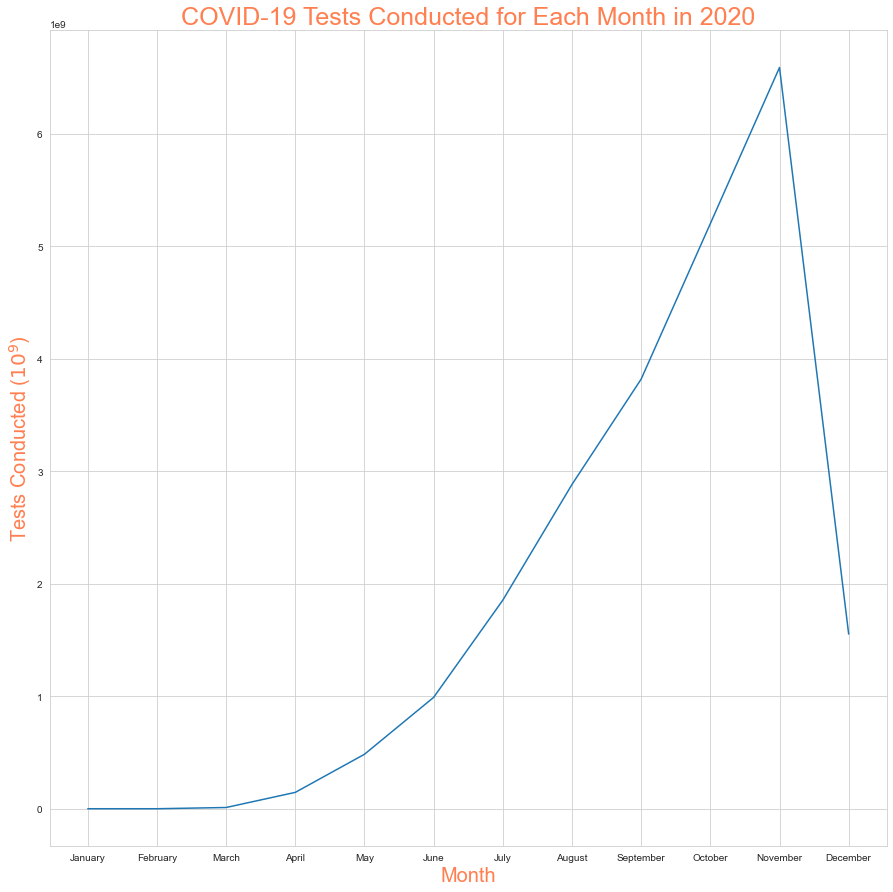

In [9]:
# The 'date' column in the df being split into month (this is a numerical representation) and 
#'month_name' which is a string representation and provides the greatest clarity when viewing it.
df_covidNew['month_name'] = df_covidNew.date.dt.month_name()
df_covidNew['month'] = df_covidNew.date.dt.month

# The 'groupby()' function being used on 'month' and 'total test results'. This returns a sum of the total tests conducted
#for each month.
linePlot = df_covidNew.groupby(['month','month_name']).agg({'totalTestResults':sum})

# Seeting the figure size and a light background with grid for visual clarity
plt.figure(figsize = (15,15))
sns.set_style("whitegrid")


# The Seaborne line plot, with 'x' and 'y' variables as well as the data which was established in line 8. 
sns.lineplot(x='month_name',y='totalTestResults',ci=None,data=linePlot)


# Setting the 'x' and 'y' labels, and the title for the plot.
plt.xlabel('Month',fontsize=20,color='coral')
plt.ylabel('Tests Conducted ($10^9$)',fontsize=20,color='coral')
plt.title('COVID-19 Tests Conducted for Each Month in 2020',fontsize=25,color='coral')




### Being Specific with a Bar Plot
I wanted to get more specific in terms of where COVID-19 has been throughout the 2020. Previously we only know the total number of tests conducted, I want to know how many were positive and their location at a state level. 

<blockquote style="border-left-color:#c28900;background:#65bffc">I have used a Matplot library to plot a bar plot to show positive cases of COVID-19 for each state. It can be seen that California (CA), Florida (FL), New York (NY), and Texas (TX) had the most postitive cases of COVID-19. I am using a 'groupby()' function to sum all the 'positive' cases for each state.</blockquote>

Text(0.5, 1.0, 'Positive Cases of COVID-19 for US States in 2020')

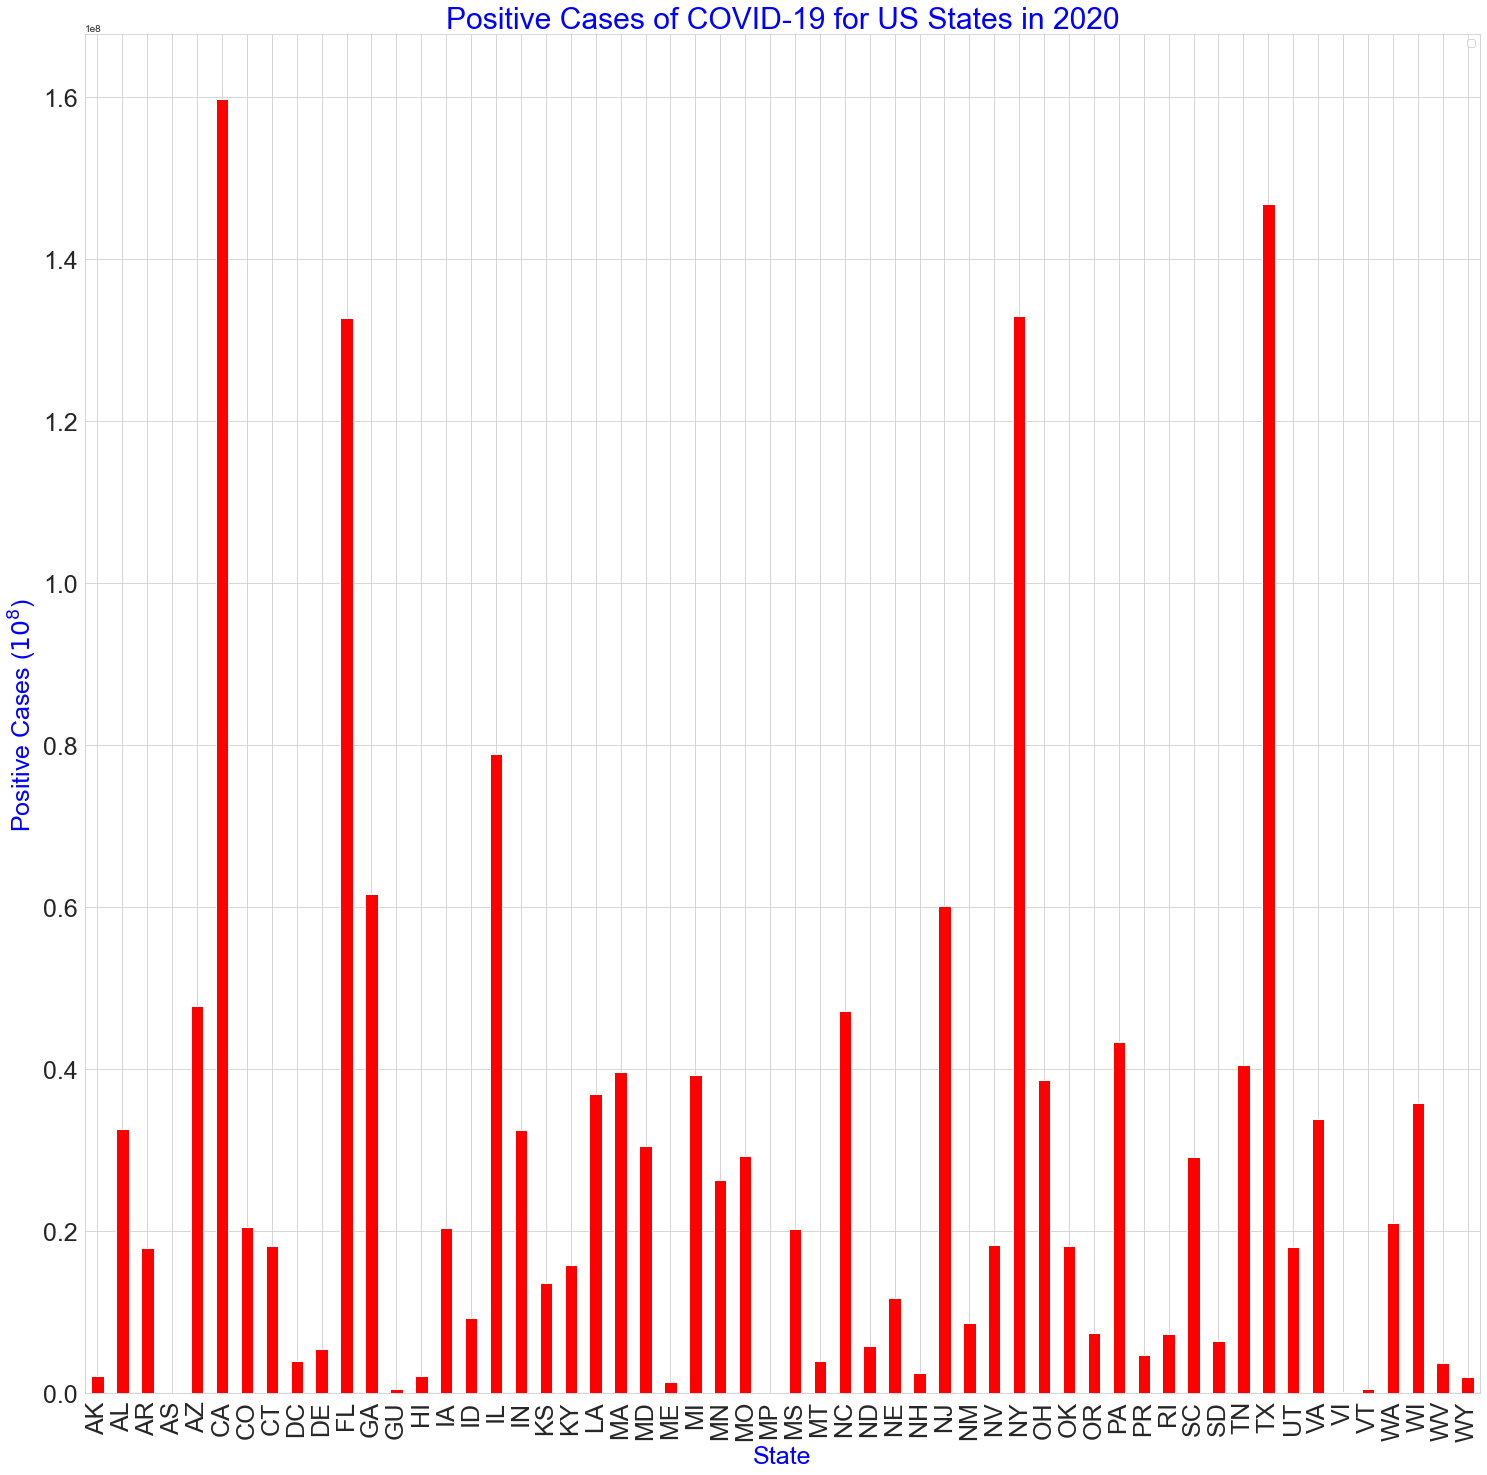

In [19]:
# Setting up the data for a bar graph to be plotted. In this case the 'groupby()' function is being used to sum the 
#positive cases for the different states. 
barPlot = df_covidNew.groupby(['state']).agg({'positive':sum})

# Plotting the bar graph, setting the figure szie, fontsize and the colour
barPlot.plot.bar(figsize=(25,25),fontsize=25,color='red')

# Setting the 'x' and 'y' labels. A legend is not needed.
plt.xlabel('State',fontsize=25,color='blue')
plt.ylabel('Positive Cases ($10^8$)',fontsize=25,color='blue')
plt.legend('')

# Setting the title for the graph
plt.title('Positive Cases of COVID-19 for US States in 2020',fontsize=30,color='blue')


### Being More Specific with a Horizontal Bar Plot
I also want to know from the tests conducted how many were negative on a state level as well. 

<blockquote style="border-left-color:#c28900;background:#65bffc">I have used a Matplot library to plot a bar plot however, this time I decided to use a horizontal bar plot. I decided to use a horizontal chart due to the values being a lot bigger and makes the graph easier to read. A similar trend can be seen with the negative COVID-19 cases as California (CA), New York (NY), and Texas (TX) also had the most amount of negative cases. Plotting the horizontal bar graph is similar to plotitng the regular bar graph. I used the 'groupby()' function. In this case it sums the negative cases for each state.</blockquote>

Text(0.5, 1.0, 'Negative Cases of COVID-19 for US States in 2020')

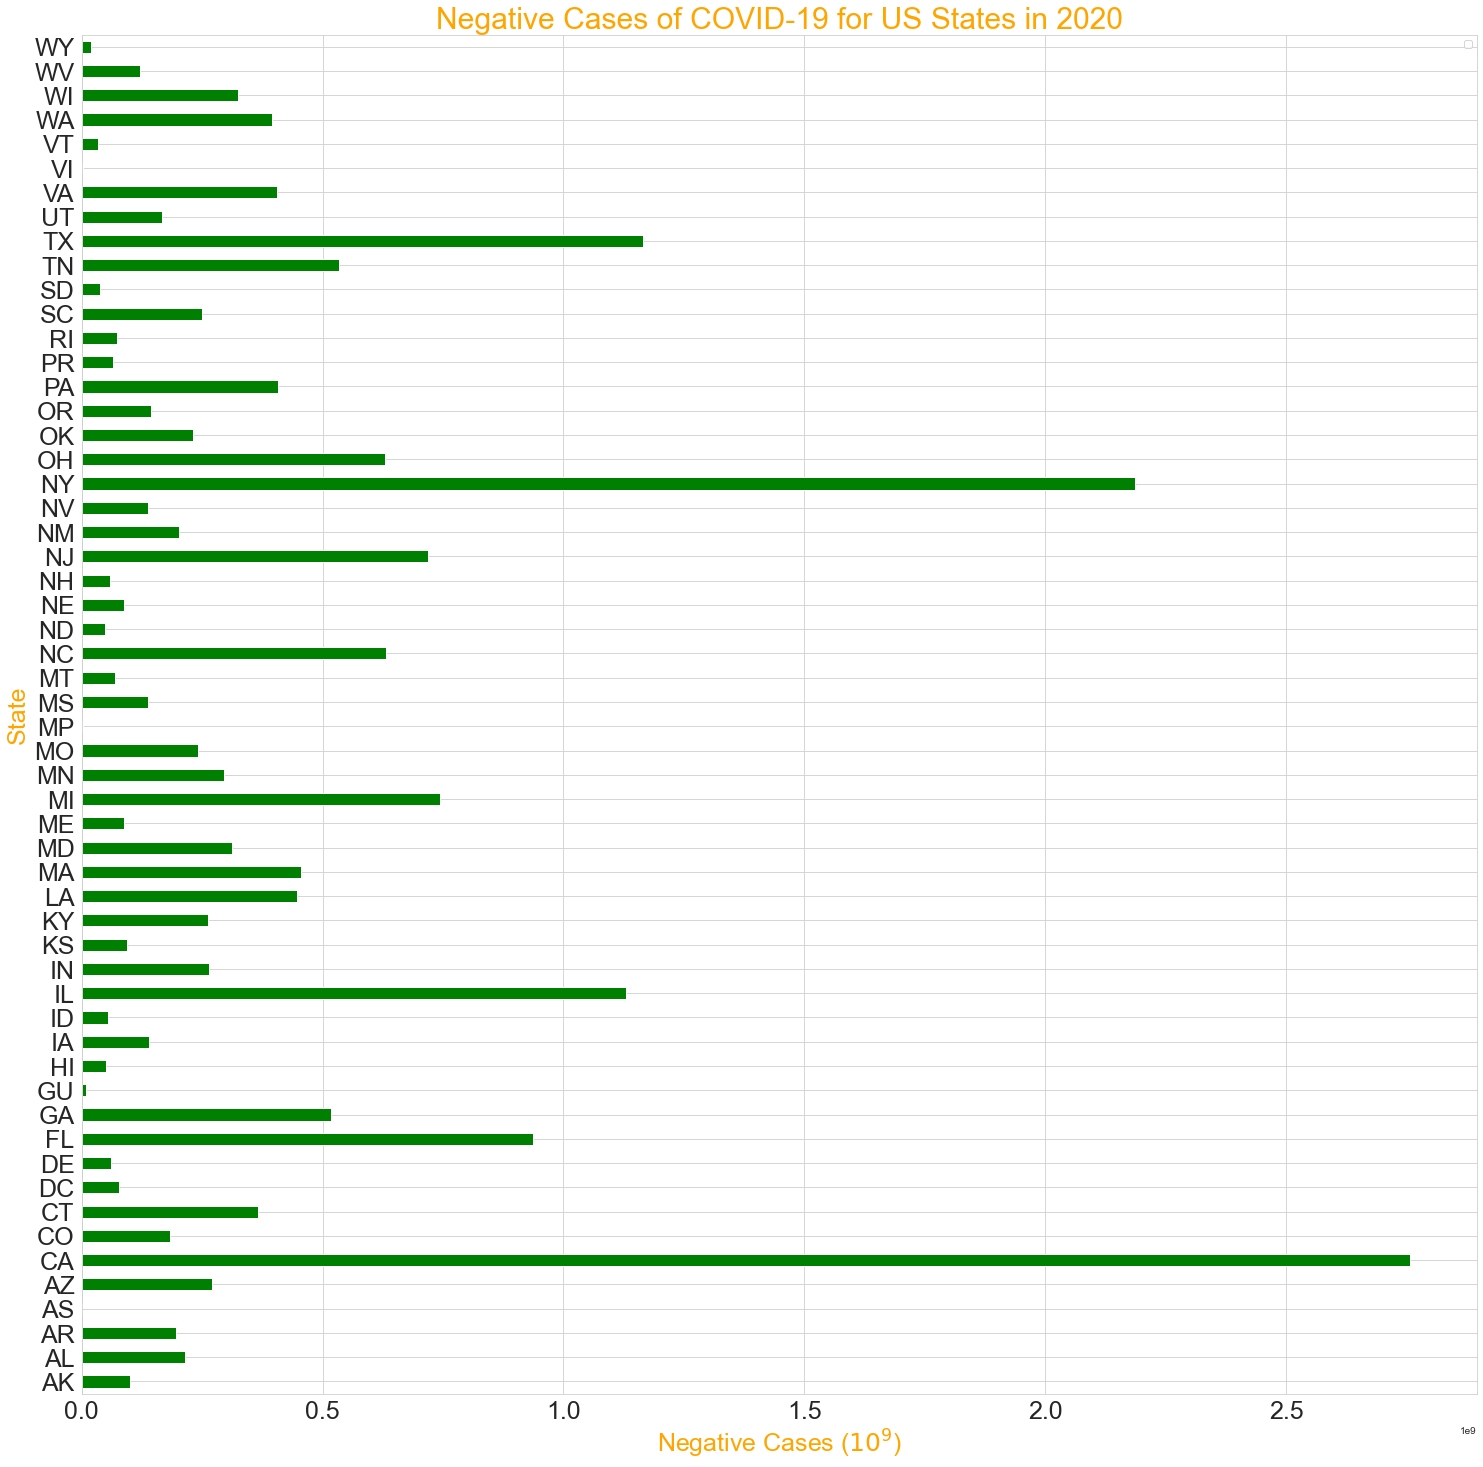

In [25]:
# Setting the data to be plotted. The 'groupby()' function used.
barPlotH = df_covidNew.groupby(['state']).agg({'negative':sum})

# Plotting the horizontal bar graph
barPlotH.plot.barh(figsize=(25,25),fontsize=25,color='green')

# Plotting labels and deleting the legend
plt.ylabel('State',fontsize=25,color='orange')
plt.xlabel('Negative Cases ($10^9$)',fontsize=25,color='orange')
plt.legend('')

# Plotting the title
plt.title('Negative Cases of COVID-19 for US States in 2020',fontsize=30,color='orange')


### Viral Testing with a Bar Plot
I was curious as to know the maximum and minimum amount of people that took the viral tests and how many were positive. Viral tests come in two varieties anti-gen and anti-bodies.

<blockquote style="border-left-color:#c28900;background:#65bffc">I have used a Matplot library to plot a bar plot to show the maximum and minimum amount of people that took the vrial tests and the maximum and minimum amount that came back positive. It can be seen that not all states took the viral tests. With states like Wisconsin (WI), Vermont (VT), and Washington (WA) to name a few.  </blockquote>

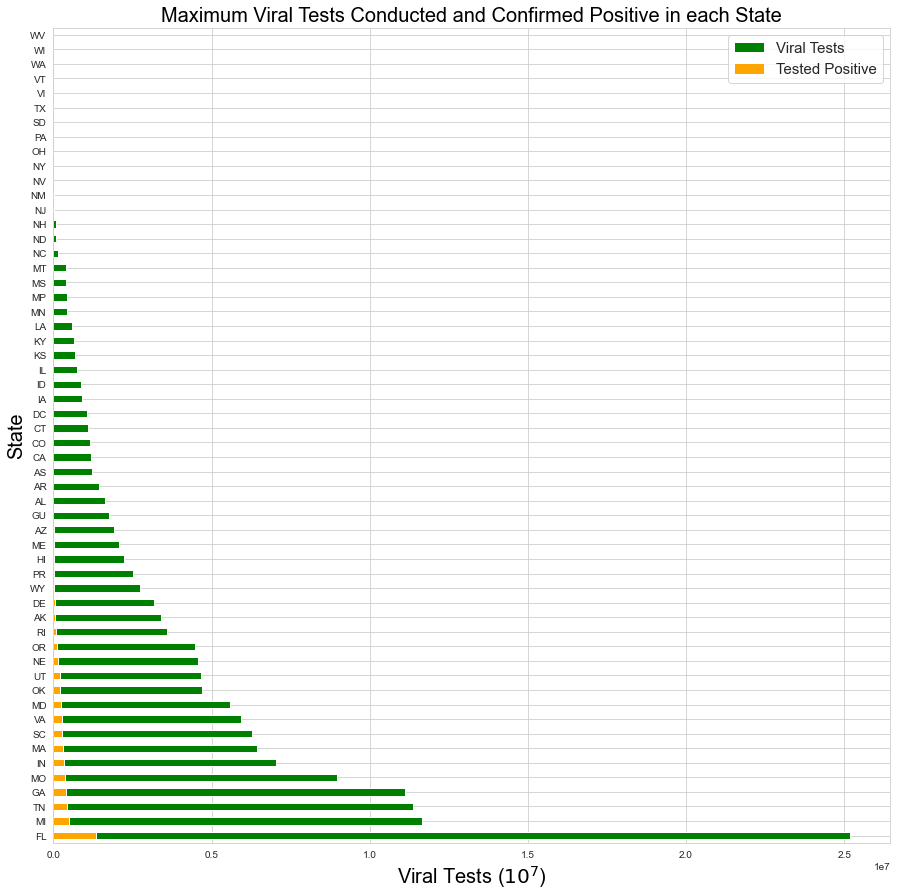

In [67]:
# Setting the data for plotting the maximum 'total viral tests' and the amount which came back 'positive'
df_covidNew.groupby('state')['totalTestsViral'].max().sort_values(ascending=False).plot.barh(figsize=(15,15),color='green')
df_covidNew.groupby('state')['positiveTestsViral'].max().sort_values(ascending=False).plot.barh(figsize=(15,15),color='orange')

# Setting the 'x','y','legend', and the graph 'title'
plt.ylabel('State',fontsize=20,color='black')
plt.xlabel('Viral Tests ($10^7$)',fontsize=20,color='black')
plt.title('Maximum Viral Tests Conducted and Confirmed Positive in each State',fontsize=20,color='black')
plt.legend(['Viral Tests','Tested Positive'],fontsize=15)

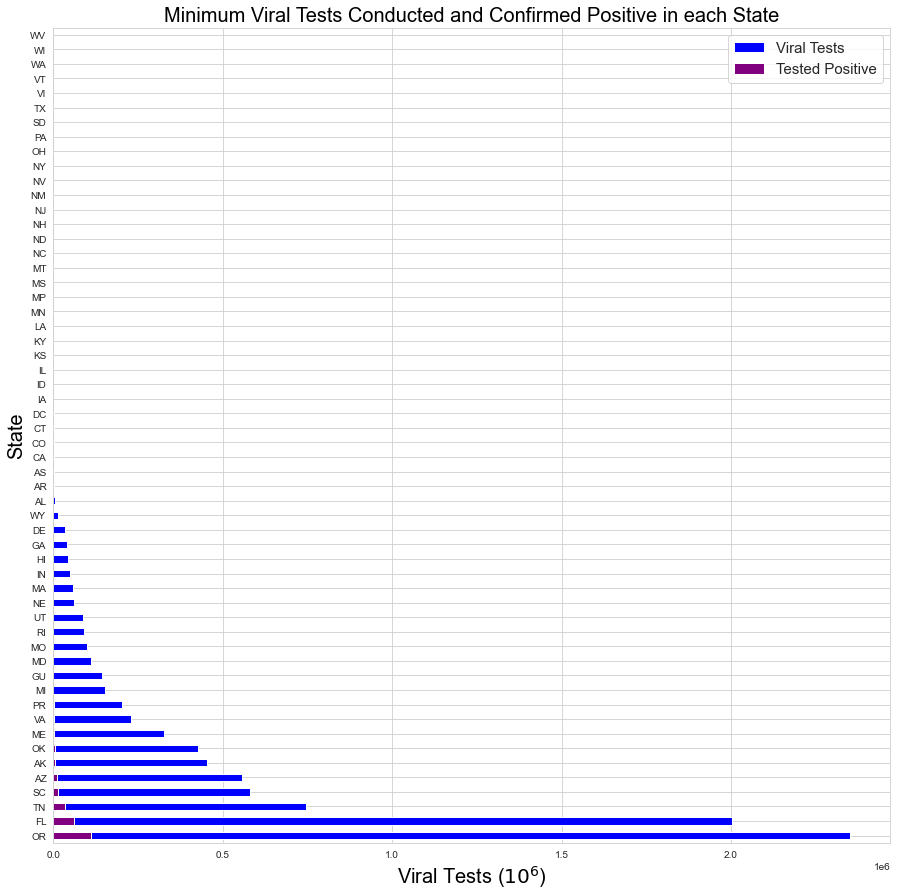

In [71]:
# Setting the data plotting the minimum 'total viral tests' and the amount which came back 'positive'
df_covidNew.groupby('state')['totalTestsViral'].min().sort_values(ascending=False).plot.barh(figsize=(15,15),color='blue')
df_covidNew.groupby('state')['positiveTestsViral'].min().sort_values(ascending=False).plot.barh(figsize=(15,15),color='purple')

# Setting the 'x','y','legend', and the graph 'title'
plt.ylabel('State',fontsize=20,color='black')
plt.xlabel('Viral Tests ($10^6$)',fontsize=20,color='black')
plt.title('Minimum Viral Tests Conducted and Confirmed Positive in each State',fontsize=20,color='black')
plt.legend(['Viral Tests','Tested Positive'],fontsize=15)

### Etreme COVID-19 Severity with a Scatter Plot
I wanted to go a bit deeper and analyse how severe COVID-19 has been and where it has been the most severe, this can be achieved by plotting the rate of people that need ventilator support for each state.  

<blockquote style="border-left-color:#c28900;background:#65bffc">I have used a Matplot library to plot a scatter plot to show how many people have been on ventilator support in each state. The plotting was done with 'groupby()' function. Whereby it will sum the number of people on ventilator support for each state. From the analysis it seems that New Jeresey (NJ), Illinois (IL) and Michigan (MI) has the highest rates of people that need ventilator support.</blockquote>

Text(0.5, 1.0, 'Number of COVID-19 Patients on Ventilator Support')

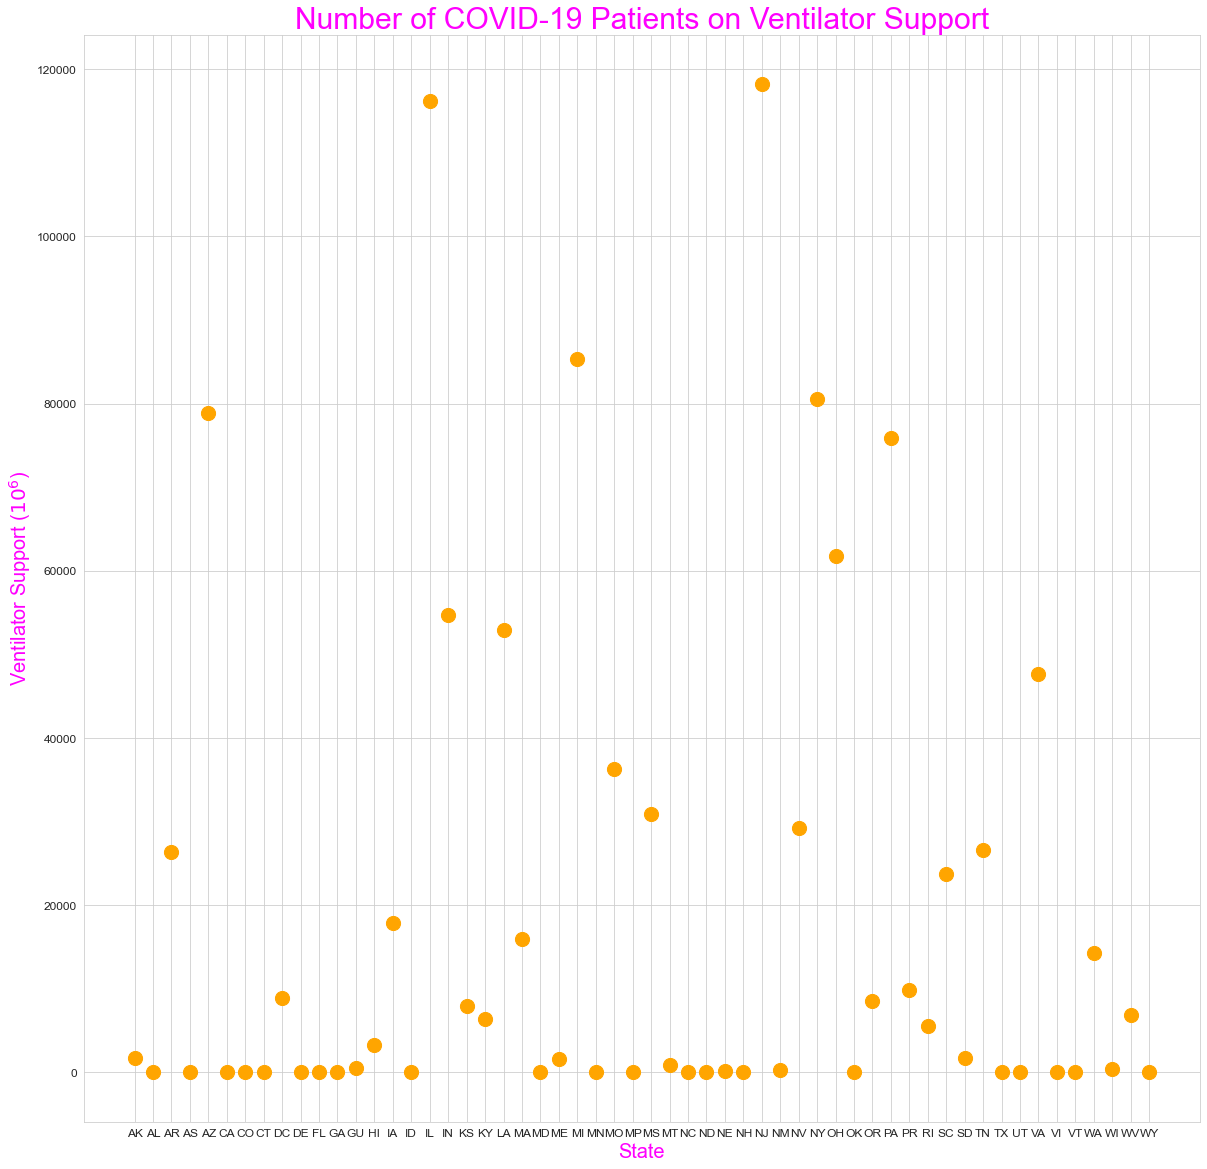

In [44]:
# Setting up the data to be plotted. Using the 'groupby()' function to sum the number of people on ventilators by state.
scatterPlot = df_covidNew.groupby(['state']).agg({'onVentilatorCurrently':sum})

# Resetting the index for plotting. This puts the indexing in another column starting from 0 to the lenght of the column.
scatterPlot.reset_index(inplace=True)

# Plotting the scatter plot. Declaring the figure size, colour, size of the plot points and a grid for readability
scatterPlot.plot.scatter(x='state',y='onVentilatorCurrently',figsize=(20,20),fontsize=12,s=200,grid=True,color='orange')

# Setting the 'x' and 'y' labels, as well as the title for the graph.
plt.ylabel('Ventilator Support ($10^6$)',fontsize=20,color='magenta')
plt.xlabel('State',fontsize=20,color='magenta')
plt.title('Number of COVID-19 Patients on Ventilator Support',fontsize=30,color='magenta')

### Severe Enough to be Hospitalised with a Box Plot
While we previosly looked at one of the most extreme (the most extreme being death) consequence of COVID-19, ventilator support, I also wanted to have a look at something less severe which is hospitalisation. Not everyone that has been hospitalised needs ventilator support. Fruthermore, I am unsure of how this has been monitored. For example, if a patient came in but didn't need ventilator support at first and then his condition worsened, and had to be put on a ventilator does that count. I am also unsure on the make up of the age-group which would give a better indication for why it is higher in some states than others.

<blockquote style="border-left-color:#c28900;background:#65bffc">I have used a Seaborne library to plot a box plot to show the range of hospitalisation for each state. The plotting was quite simple as it only required the column name which in this case was the state and the hospitalisation rate. A box plot is quite convenient as it gives an overview of the most important statistics like: maximum, minimum, IQR, and median. The common thread among these plots is that CA, FL, TX and NY being the most interesting out of the rest. It can be seen that TX and FL has no outlier data. While NY has a larger 75th precentile than TX, CA and FL. </blockquote>

C:\Users\tmich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'COVID-19 Patients that have Hospitalised')

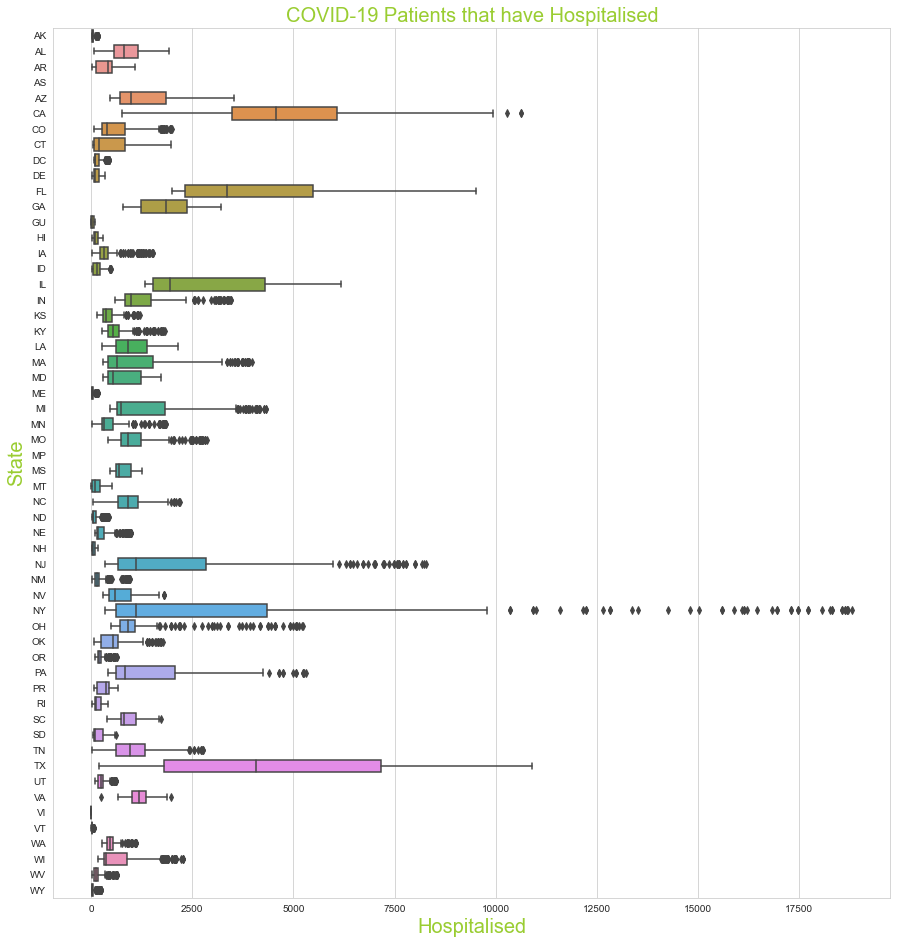

In [64]:
# Setting the size of the figure
fig,ax = plt.subplots(figsize=(15,16))
                    
# Plotting the box plot, with an 'x-value','y-value' and the dataframe
sns.boxplot('hospitalizedCurrently','state', data=df_covidNew,ax=ax);

# Setting the 'x' and 'y' label and the title
plt.ylabel('State',fontsize=20,color='yellowgreen')
plt.xlabel('Hospitalised',fontsize=20,color='yellowgreen')
plt.title('COVID-19 Patients that have Hospitalised',fontsize=20,color='yellowgreen')


### COVID-19 Recovery with a Stacked Plot
I have alredy looked at patients on ventilators and patients that have been hospitalised. I now want to look at the recovery rate for COVID-19 patients. I wanted to get a quick snapshot of how many patients recovered from COVID-19. Hence a stakced plot which plots the maximum and minimum recovery rates, and a bar plot whihc plots the average serves that function adaquetly. 

<blockquote style="border-left-color:#c28900;background:#65bffc"> I have created a stacked plot of the maximum and minimum recovery rates for COVID-19 patients for each state. </blockquote>

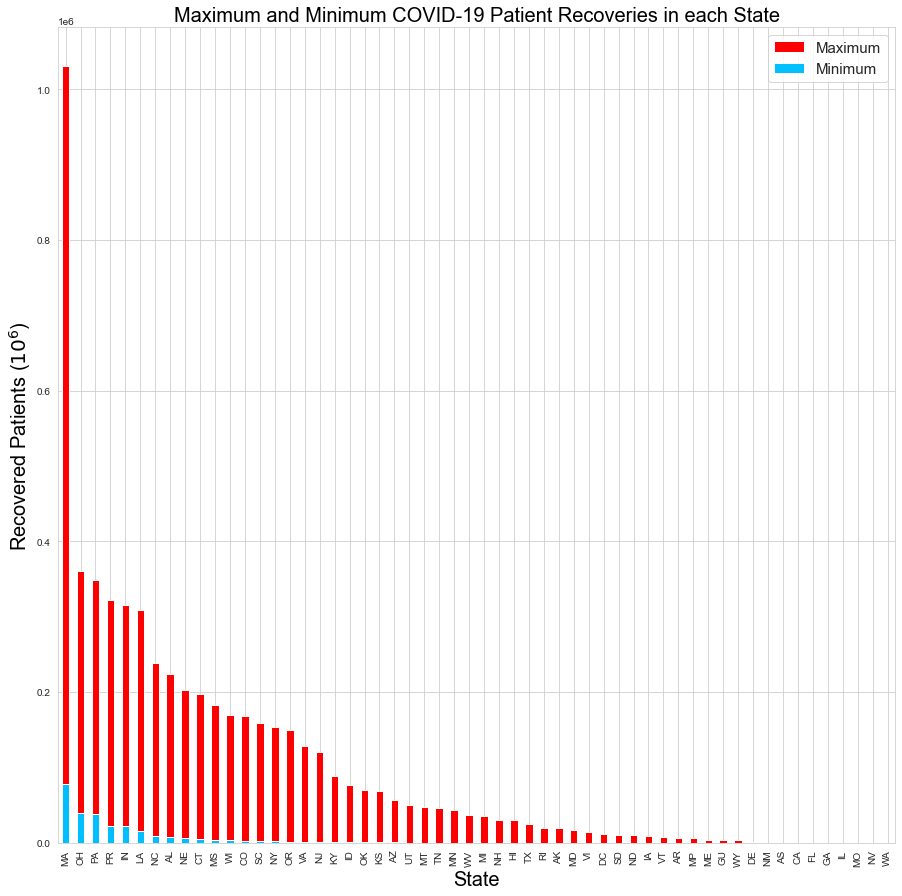

In [47]:
# Setting the plotting for the maximum and minimum values and plotting it
df_covidNew.groupby('state')['recovered'].max().sort_values(ascending=False).plot.bar(figsize=(15,15),color='red')
df_covidNew.groupby('state')['recovered'].min().sort_values(ascending=False).plot.bar(figsize=(15,15),color='deepskyblue')

# Setting the 'x','y','legend', and the graph 'title'
plt.ylabel('Recovered Patients ($10^6$)',fontsize=20,color='black')
plt.xlabel('State',fontsize=20,color='black')
plt.title('Maximum and Minimum COVID-19 Patient Recoveries in each State',fontsize=20,color='black')
plt.legend(['Maximum','Minimum'],fontsize=15)

<blockquote style="border-left-color:#c28900;background:#65bffc"> I have created a bar plot of the average recovery rates for COVID-19 patients for each state. </blockquote>

Text(0.5, 1.0, 'Average COVID-19 Patient Recovery in each State')

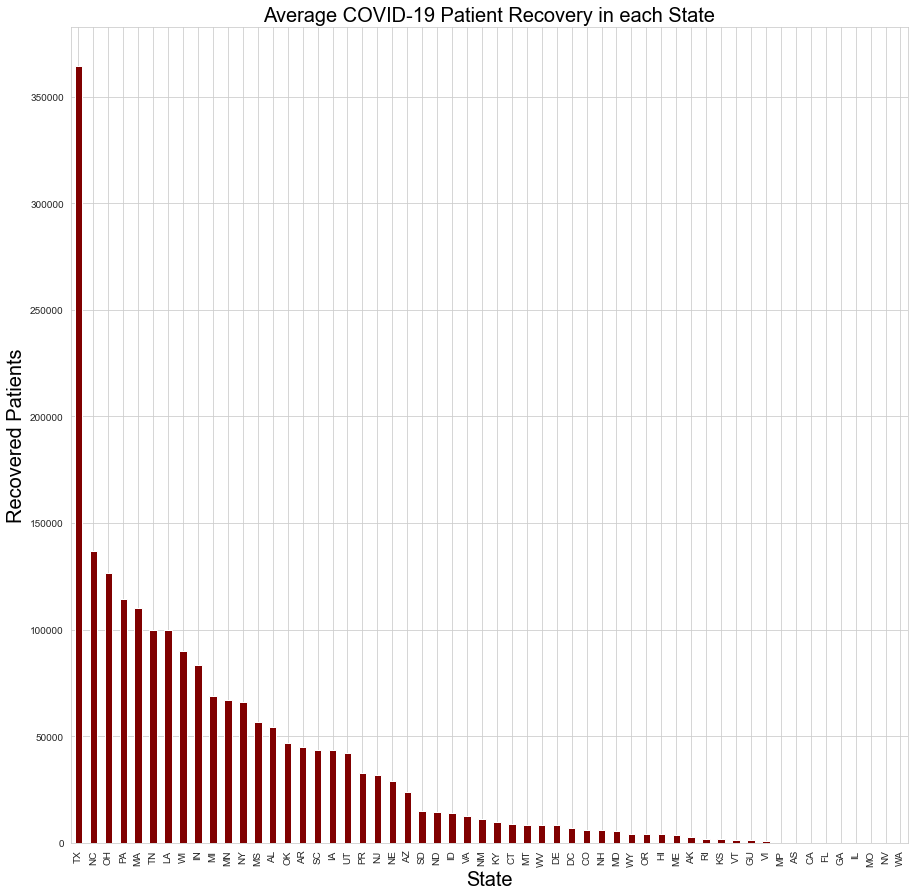

In [45]:
# Setting the data for a scatter plot that plots the average cases
df_covidNew.groupby('state')['recovered'].mean().sort_values(ascending=False).plot.bar(figsize=(15,15),color='maroon')

# Setting the 'x' and 'y' labels and the 'title'
plt.ylabel('Recovered Patients',fontsize=20,color='black')
plt.xlabel('State',fontsize=20,color='black')
plt.title('Average COVID-19 Patient Recovery in each State',fontsize=20,color='black')


### A Common Theme with a Pair Plot
One of the most interesting aspects from the analysis that came to my attention was California (CA), Texas (TX), New York (NY) and Florida(FL). These states always seemed to be the most outstanding. For example, these four had the highest rates of positive cases, hospitalisation, ventilator support to name a few. As a result, I wanted to go a bit deeper and actually do an analysis.

<blockquote style="border-left-color:#c28900;background:#65bffc"> I have used the seaborn library to create a pair plot. It can be seen that NY had the highest death rates and hospitalisation. Furthermore, the plot shows a very high degree of correlation between positive cases and death. In addition to this, there is also a correlation between hospitalisation and positive cases.</blockquote>

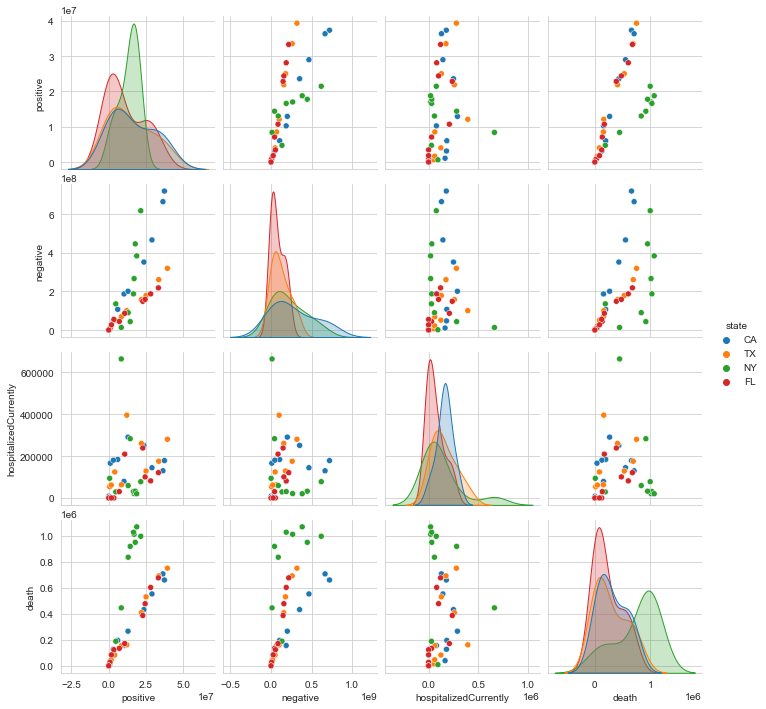

In [73]:
# Seperating data realted to CA, TX, NY and FL from the main data frame (df_covidNew) for CA, TX, NY, and FL
df_CA = df_covidNew[df_covidNew.state == "CA"]
df_TX = df_covidNew[df_covidNew.state == "TX"]
df_NY = df_covidNew[df_covidNew.state == "NY"]
df_FL = df_covidNew[df_covidNew.state == "FL"]

# Grouping all the necessary data to be plotted
CA = df_CA.groupby(['month_name','state'])[['positive','negative','hospitalizedCurrently','death']].sum()
TX = df_TX.groupby(['month_name','state'])[['positive','negative','hospitalizedCurrently','death']].sum()
NY = df_NY.groupby(['month_name','state'])[['positive','negative','hospitalizedCurrently','death']].sum()
FL = df_FL.groupby(['month_name','state'])[['positive','negative','hospitalizedCurrently','death']].sum()

# Concatenating the data for states which will make the pair plot easier to read and compare
df_States = pd.concat([CA,TX,NY,FL])

# Plotting a pair plot, which is seperated by states
sns.pairplot(df_States.reset_index(),hue='state')


### The Finale with a Heat Map
COVID-19 has taken many lives over the year 2020. I wanted an anlaysis from a time and location perspective. A heat map allows me to analyse the death count for each state and for each month of the year.

<blockquote style="border-left-color:#c28900;background:#65bffc"> I have created a heat map for the death count in each state for every month of the year. Obviously, January and February had little to no death and it started climbimg in the later months. New York (NY), New Jeresey (NJ), California (CA), Texas (TX) and Pennsylvania (PA) had some of the highest death rates. With NY reaching almost 1-million deaths in November. Furthermore, the safest country to be in would be American Samoa (AS) as it has not reported a single death</blockquote>

Text(0.5, 1.0, 'COVID-19 Death Count in US States for 2020')

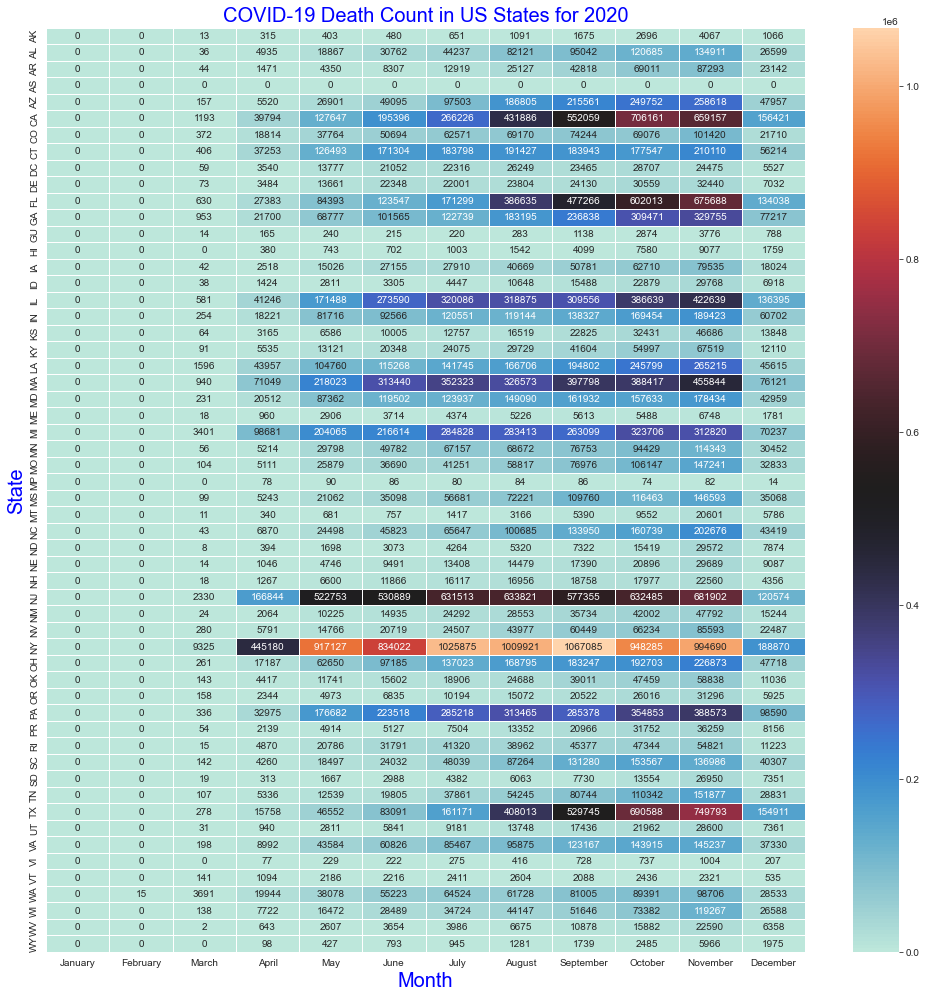

In [178]:
# Setting the data for the heatmap. By deafault any values with 0 will be given a 'NaN' value and it would make the
#very cumbersome to read. Hence, the 'fillna(0)' attribute was used to fill it with 0's.
heatPlot = df_covidNew.groupby(['state','month'],as_index = False).sum().pivot('state','month','death').fillna(0)

# Defining the x-tick labels
xticks = ['January','February','March','April','May','June','July','August','September','October','November','December']

# Setting the figure size
plt.figure(figsize = (17,17))

# Plotting the heatmap with the death count
sns.heatmap(heatPlot,linewidths=.5,annot=True,xticklabels=xticks,fmt='.0f',cmap='icefire')

# Labelling the 'x','y' labels and the 'title' as well
plt.ylabel('State',fontsize=20,color='blue')
plt.xlabel('Month',fontsize=20,color='blue')
plt.title('COVID-19 Death Count in US States for 2020',fontsize=20,color='blue')


<h1> <center> Conclusion </center></h1>
In conclusion, the pattern that has emerged has been that of Texas (TX), California (CA), New York (NY) and FLorida (FL). In terms of total deaths-by looking at the heatmap- NY consistently had the most deaths starting in April all the way to November. States like FL, CA and TX also had high death counts however, managed to stay under 700,000 total deaths with the exception of TX which reached almost 750,000 in November.

The same pattern holds when it comes to hospitalisations as well. When looking at the box-plot TX had the highest rate of hospitalisations however, NY had a significant amount of outliers as well. Furthermore, FL and CA had similar amount of hospitalisations.

It is difficult to gauge which state(s) handled the pandemic the best. The data that is being analysed is only for 1-year. The analysis as a whole could have used data from the 2021 year as well to get a better understanding of the spread. For example, the number of deaths started to increase as winter came along and I would have like to have seen if the pattern emerged again. Not only that I also wanted to see how the vaccines woudl have played a part in deacreasing the numebr of cases and deaths. Furthermore, the effectiveness of the different vaccines (Moderna, Pfizer, Novax) would have also been interesting. 